In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
import os
import json
from pprint import pprint

sys.path.append(os.path.abspath('../'))
from data import Data

path_to_data="/home/akhazi/Dropbox/University College London/MSc/Dissertation/Datasets/data/"
path_to_data_win="C:/Users/Adam Khazi/Dropbox/University College London/MSc/Dissertation/Datasets/data/"

In [8]:
with open(path_to_data_win + "mpd.slice.0-999.json") as f:
    data = json.load(f)

In [9]:
d = Data()
playlistData = d.load(1)

NameError: name 'DATASETDIR' is not defined

In [4]:
type(data)

dict

In [28]:
data['info']

{'generated_on': '2017-12-03 08:41:42.057563',
 'slice': '0-999',
 'version': 'v1'}

## Track Lengths

In [6]:
playlist_dist = dict()
for playlist in data["playlists"]:
    if playlist["num_tracks"] not in playlist_dist:
        playlist_dist[playlist["num_tracks"]] = 1
    else:
        playlist_dist[playlist["num_tracks"]]+=1

In [7]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_tracks=[t[0] for t in playlist_tuples]
playlist_nr_nr_tracks=[t[1] for t in playlist_tuples]

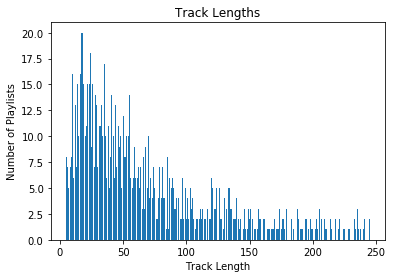

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(playlist_nr_tracks, height=playlist_nr_nr_tracks)
plt.title('Track Lengths')
plt.xlabel('Track Length')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits

In [10]:
playlist_dist = dict()
for playlist in data["playlists"]:
    if playlist["num_edits"] not in playlist_dist:
        playlist_dist[playlist["num_edits"]] = 1
    else:
        playlist_dist[playlist["num_edits"]] += 1

In [14]:
playlist_tuples = list(playlist_dist.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits=[t[1] for t in playlist_tuples]

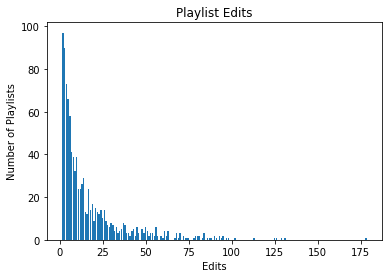

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(playlist_nr_tracks, height=playlist_nr_nr_tracks)
plt.title('Playlist Edits')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')
plt.show()

## Playlist Edits (checking collaboration)

In [18]:
playlist_dist_collab_on = dict()
for playlist in data["playlists"]:
    if playlist["collaborative"] == 'true':
        if playlist["num_edits"] not in playlist_dist_collab_on:
            playlist_dist_collab_on[playlist["num_edits"]] = 1
        else:
            playlist_dist_collab_on[playlist["num_edits"]] += 1

In [19]:
playlist_dist_collab_off = dict()
for playlist in data["playlists"]:
    if playlist["collaborative"] == 'false':
        if playlist["num_edits"] not in playlist_dist_collab_off:
            playlist_dist_collab_off[playlist["num_edits"]] = 1
        else:
            playlist_dist_collab_off[playlist["num_edits"]] += 1

In [20]:
playlist_tuples = list(playlist_dist_collab_on.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_on=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_on=[t[1] for t in playlist_tuples]

In [21]:
playlist_tuples = list(playlist_dist_collab_off.items())
playlist_tuples.sort(key=lambda tup: tup[0])
playlist_nr_edits_off=[t[0] for t in playlist_tuples]
playlist_nr_nr_edits_off=[t[1] for t in playlist_tuples]

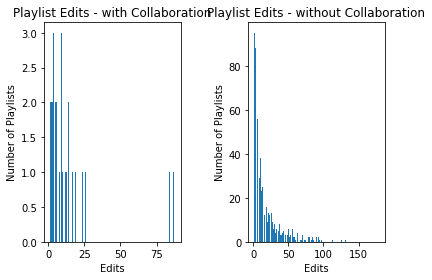

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,2,1)
ax.bar(playlist_nr_edits_on, height=playlist_nr_nr_edits_on)
plt.title('Playlist Edits - with Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

ax = fig.add_subplot(1,2,2)
ax.bar(playlist_nr_edits_off, height=playlist_nr_nr_edits_off)
plt.title('Playlist Edits - without Collaboration')
plt.xlabel('Edits')
plt.ylabel('Number of Playlists')

plt.tight_layout()
plt.show()

## Duration of Playlists

In [5]:
playlist_len_ms = []
for playlist in data["playlists"]:
    playlist_len_ms.append(playlist['duration_ms'])

In [9]:
playlist_len_ms.sort()

In [19]:
playlist_len_ms
playlist_len_mins = [(x / 100)/60 for x in playlist_len_ms] # in mins

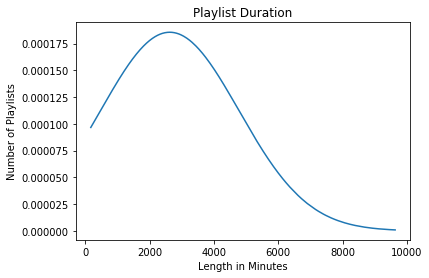

In [24]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

hmean = np.mean(playlist_len_mins)
hstd = np.std(playlist_len_mins)
pdf = stats.norm.pdf(playlist_len_mins, hmean, hstd)
plt.title('Playlist Duration')
plt.xlabel('Length in Minutes')
plt.ylabel('Number of Playlists')

plt.plot(playlist_len_mins, pdf) # including h here is crucial